In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\H.W\Desktop\Spark\matches.csv')
data.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

### Check for Null Values

In [8]:
data.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

### Fill Null Values in Data

In [6]:
data.fillna('Null',inplace=True)

In [19]:
data.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


# The Best Players & Teams I suggest
## Best Players

In [35]:
player=dict(data['player_of_match'].value_counts())
lst=list(player.keys())
print('The Best Player : ',lst[0])
print('The Best Five Players : ',lst[0:5])

The Best Player :  CH Gayle
The Best Five Players :  ['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner']


## Best Teams

In [36]:
teams=data['winner'].value_counts()
lst1=list(teams.keys())
print('The Best Team : ',lst1[0])
print('The Best Five Teams : ',lst1[0:5])

The Best Team :  Mumbai Indians
The Best Five Teams :  ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab']


## The Result of Toss

In [11]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

### The Number of victory for every team

In [18]:
data.value_counts(data['winner'])

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Null                             4
dtype: int64

### The count of toss winner at matches for every team

In [20]:
data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

## The most team wins matches by wickets

In [28]:
dff=dict(data.value_counts(['win_by_wickets','winner']))
#print(dff)
key_wicket=list(dff.keys())
val_wicket=list(dff.values())
most_team_wicket=list(key[0])
print('The Most Team wins by wickets is : ',most_team[1])
print('The Most Number of wickets is : ',val[0])

The Most Team wins by wickets is :  Mumbai Indians
The Most Number of wickets is :  59


## The most team wins matches by runs

In [33]:
df1=dict(data.value_counts(['win_by_runs','winner']))
#print(df1)
key_runs=list(df1.keys())
val_runs=list(df1.values())
most_team_run=list(key_runs[0])
print('The Most Team wins by runs is : ',most_team_run[1])
print('The Most Number of runs is : ',val_runs[0])

The Most Team wins by runs is :  Kolkata Knight Riders
The Most Number of runs is :  56


#### The Relation between Toss Winner & The Winner of The Match

In [22]:
tt=data.value_counts(['toss_winner','winner'])
tt

toss_winner                  winner                     
Chennai Super Kings          Chennai Super Kings            57
Mumbai Indians               Mumbai Indians                 56
Kolkata Knight Riders        Kolkata Knight Riders          53
Rajasthan Royals             Rajasthan Royals               42
Royal Challengers Bangalore  Royal Challengers Bangalore    41
                                                            ..
Sunrisers Hyderabad          Rising Pune Supergiant          1
Kochi Tuskers Kerala         Deccan Chargers                 1
Delhi Capitals               Kings XI Punjab                 1
Rising Pune Supergiants      Royal Challengers Bangalore     1
Mumbai Indians               Pune Warriors                   1
Length: 123, dtype: int64

#### The Relation between Toss Decision & The Winner of The Match

In [123]:
aa=data.value_counts(['toss_decision','winner'])
aa

toss_decision  winner                     
field          Mumbai Indians                 64
               Kings XI Punjab                61
               Royal Challengers Bangalore    58
               Kolkata Knight Riders          57
bat            Chennai Super Kings            52
field          Chennai Super Kings            48
bat            Mumbai Indians                 45
field          Rajasthan Royals               41
               Delhi Daredevils               38
               Sunrisers Hyderabad            37
bat            Kolkata Knight Riders          35
               Rajasthan Royals               34
               Delhi Daredevils               29
               Royal Challengers Bangalore    26
               Sunrisers Hyderabad            21
               Kings XI Punjab                21
field          Deccan Chargers                15
bat            Deccan Chargers                14
field          Gujarat Lions                  11
               Rising Pune

### Graphs of relation between toss decision & the winner of the match 
   ###   And relation between toss winner & the winner of the match

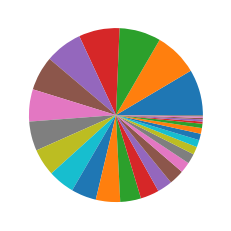

In [138]:
# Toss_decision & winner
plt.pie(aa)
plt.show()

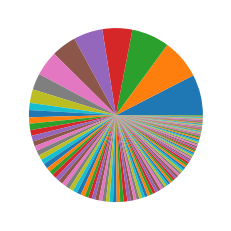

In [27]:
# Toss_winner & winner
plt.pie(tt)
plt.show()